# **Predict the Quality of The Wine**

According to experts, the wine is differentiated according to its smell, flavor, and color, but we are not a wine expert to say that wine is good or bad. What will we do then? Here’s the use of Machine Learning comes, yes you are thinking to write we are using machine learning to check wine quality. ML have some techniques that will discuss below

To the ML model (using severl Classification Model), we first need to have data for that you don’t need to go anywhere just click here for the wine quality dataset. This dataset was picked up from the Kaggle.

Now, we start our journey towards the prediction of wine quality, as you can see in the data that there is red and white wine, and some other features. Let’s start.


# **Description of Dataset**

If you download the dataset, you can see that several features will be used to classify the quality of wine, many of them are chemical, so we need to have a basic understanding of such chemicals.


1. volatile acidity :   Volatile acidity is the gaseous acids present in wine.
2. fixed acidity :   Primary fixed acids found in wine are tartaric, succinic
3. residual sugar :   Amount of sugar left after fermentation.
4. citric acid :    It is weak organic acid, found in citrus fruits naturally.
5. chlorides :   Amount of salt present in wine.
6. free sulfur dioxide :   So2 is used for prevention of wine by oxidation and  microbial spoilage. 
7. pH :   In wine pH is used for checking acidity
density 
8. total sulfur dioxide 
9. sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
10. density 
11. alcohol :   Percent of alcohol present in wine.
12. quality : rate from 0 to 10
13. type: Rather than chemical features, you can see that there is one feature named Type it contains the types of wine we here discuss on red and white wine, the percent of red wine is greater than white.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("wine.csv")
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  color                 6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [ ]:
data.shape

(6497, 13)

# **Visualization**

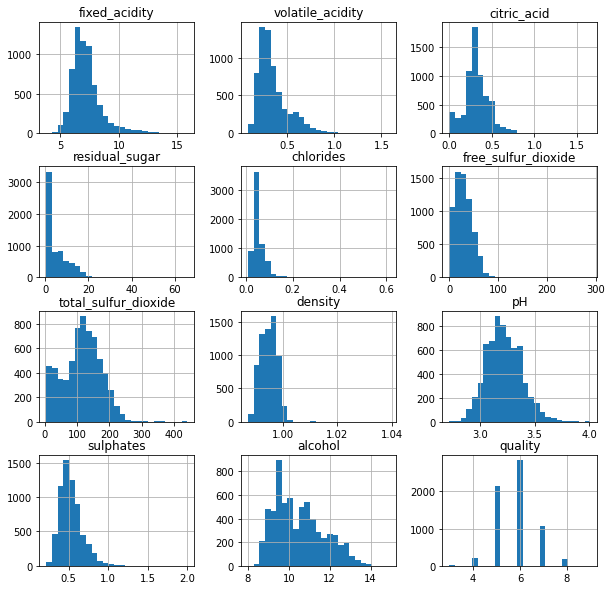

In [ ]:
data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

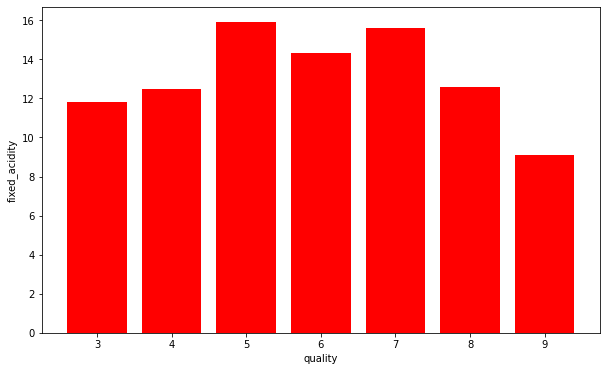

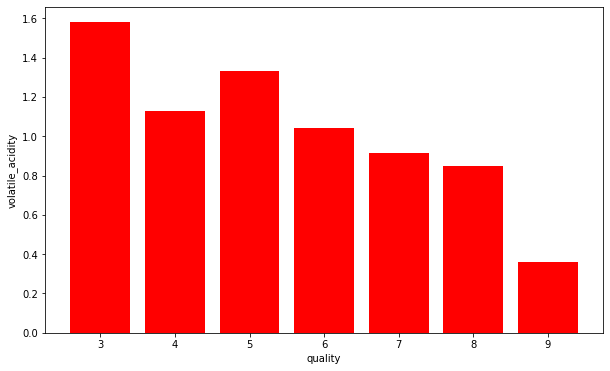

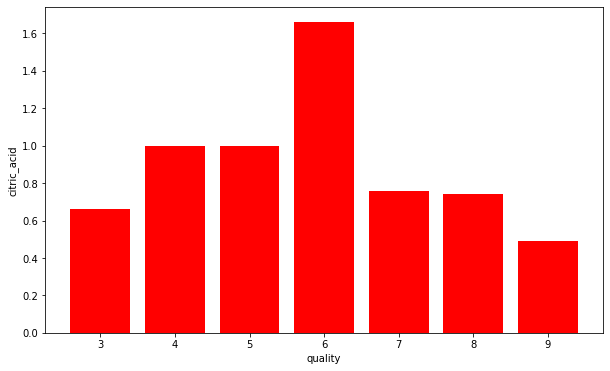

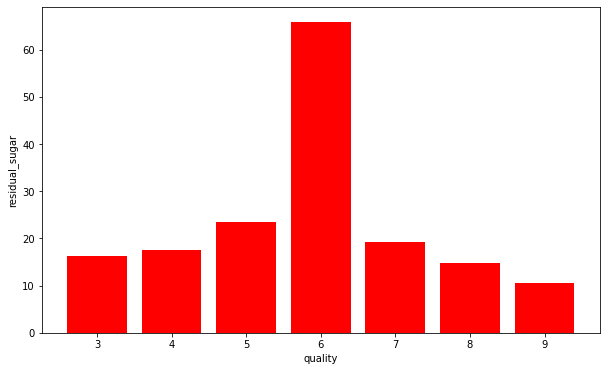

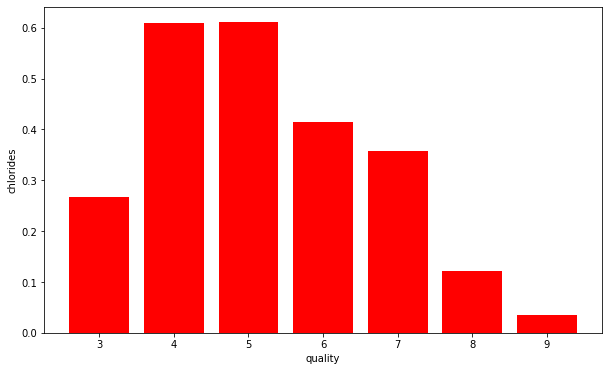

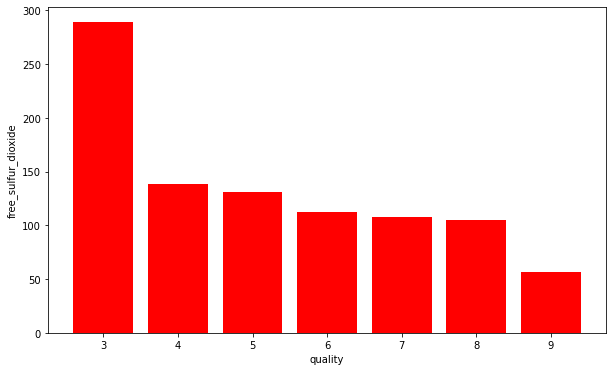

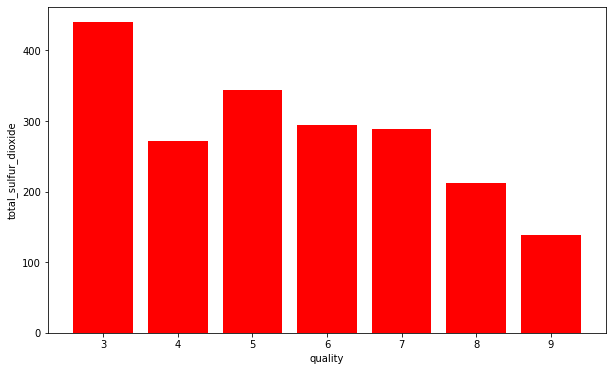

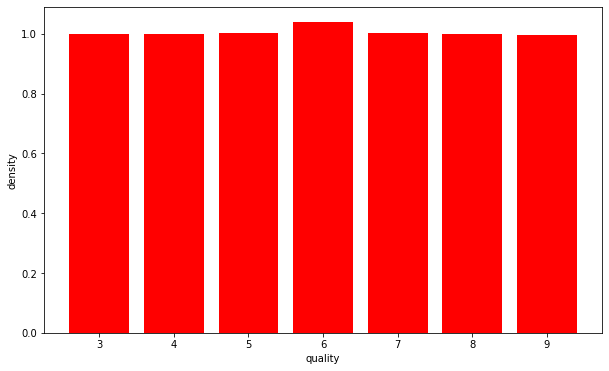

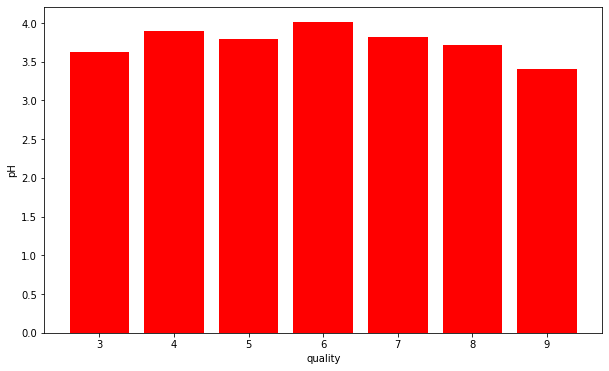

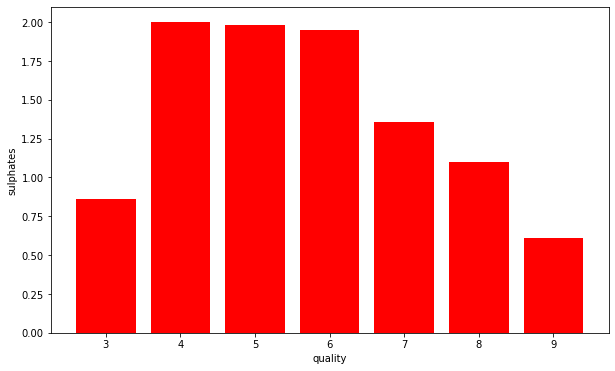

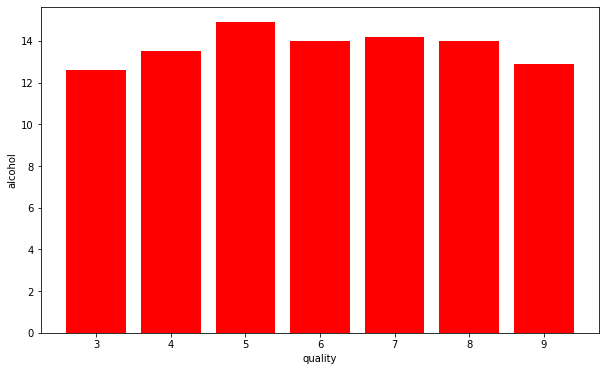

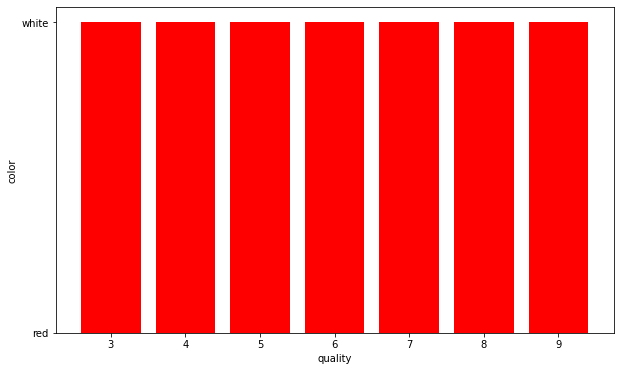

In [ ]:
for col in data.columns:
  if(col == 'quality' or col =='type'):
    continue
  plt.figure(figsize=[10,6])
  plt.bar(data['quality'],data[col],color='red')
  plt.xlabel('quality')
  plt.ylabel(col)

# **Correlation**

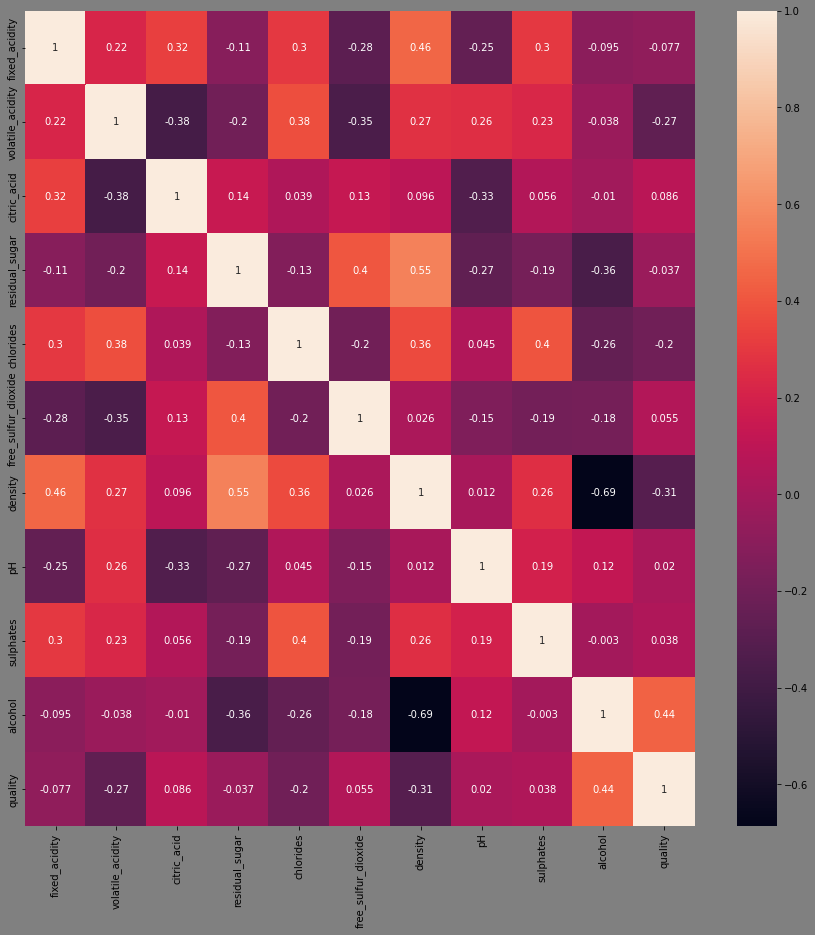

In [ ]:
# ploting heatmap
plt.figure(figsize=[15,15],facecolor='grey')
corr = data.corr()
sb.heatmap(corr,annot=True)

In [ ]:
#find the corroleted features to remove them
col = []
for i in range(len(corr.columns)):
  for j in range(i):
    if(abs(corr.iloc[i,j]>0.7)):
      col.append(corr.columns[i]) 
print(col)



['total_sulfur_dioxide']


In [ ]:
data.drop(col, axis=1, inplace=True)
data.shape

(6497, 12)

# **Data Preprocessing**

In [ ]:
y = data['quality']
x = data.drop('quality', axis=1)

In [ ]:
x.isnull().sum()

fixed_acidity          0
volatile_acidity       0
citric_acid            0
residual_sugar         0
chlorides              0
free_sulfur_dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
color                  0
dtype: int64

# **Encoding The Categorical Features**

In [ ]:
x_num = x.copy()
x = pd.get_dummies(x, drop_first=True)


      fixed_acidity  volatile_acidity  ...  alcohol  color_white
0              7.40              0.70  ...     9.40            0
1              7.80              0.88  ...     9.80            0
2              7.80              0.76  ...     9.80            0
3             11.20              0.28  ...     9.80            0
4              7.40              0.70  ...     9.40            0
...             ...               ...  ...      ...          ...
6492           6.20              0.21  ...    11.20            1
6493           6.60              0.32  ...     9.60            1
6494           6.50              0.24  ...     9.40            1
6495           5.50              0.29  ...    12.80            1
6496           6.00              0.21  ...    11.80            1

[6497 rows x 11 columns]


# **Features Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
x_mm = mm.fit_transform(x)
print(x_mm)

[[0.29752066 0.41333333 0.         ... 0.19101124 0.20289855 0.        ]
 [0.33057851 0.53333333 0.         ... 0.25842697 0.26086957 0.        ]
 [0.33057851 0.45333333 0.02409639 ... 0.24157303 0.26086957 0.        ]
 ...
 [0.2231405  0.10666667 0.11445783 ... 0.13483146 0.20289855 1.        ]
 [0.14049587 0.14       0.18072289 ... 0.08988764 0.69565217 1.        ]
 [0.18181818 0.08666667 0.22891566 ... 0.05617978 0.55072464 1.        ]]


# **Splitting the Data**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

train, test = next(sss.split(x_mm, y))

x_train = x_mm[train]
x_test = x_mm[test]
y_train = y.iloc[train]
y_test = y.iloc[test]


#**CLASSIFICATION MODEL 1 : K N N**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred= KNN.predict(x_test)
print(y_pred)

[6 7 7 ... 7 6 5]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
report_KNN = classification_report(y_test,y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(report_KNN)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        15
           4       0.70      0.13      0.22       108
           5       0.68      0.71      0.69      1069
           6       0.62      0.76      0.68      1418
           7       0.69      0.46      0.55       540
           8       0.85      0.29      0.43        97
           9       0.00      0.00      0.00         2

    accuracy                           0.65      3249
   macro avg       0.51      0.33      0.37      3249
weighted avg       0.66      0.65      0.64      3249



In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

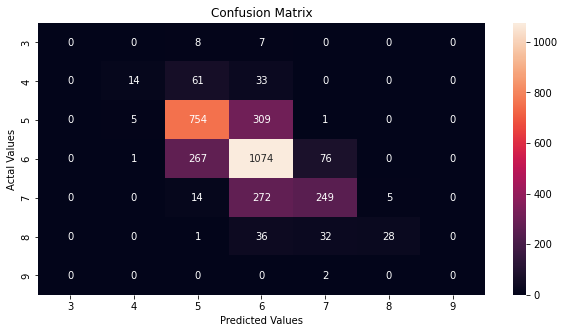

In [ ]:
cm_df = pd.DataFrame(cm, index=['3','4','5','6','7','8','9'], columns=['3','4','5','6','7','8','9'])
#Plotting the confusion matrix
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(10,5))
sb.heatmap(cm_df, annot=True, fmt='.4g' )
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# **CLASSIFICATION MODEL 2 : RANDOM FOREST**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss_RandomForest = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

train_RF, test_RF = next(sss.split(x_num, y))

x_train_RF = x_num.iloc[train_RF]
x_test_RF = x_num.iloc[test_RF]
y_train_RF = y.iloc[train]
y_test_RF = y.iloc[test]

**Train The Model 2: RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True ,n_jobs=-1, bootstrap=True)

oob = list()
trees= [15, 20, 30,40, 60,80,100,120, 150 ,200, 300 ,400,1000,2000]

for n in trees:
  rf.set_params(n_estimators=n)
  rf.fit(x_train_RF, y_train_RF)
  oob_error = 1 - rf.oob_score_
  oob.append(pd.Series({"NUM of Trees":n, "RANDOM FOREST OOB": oob_error}))

rf_oob = pd.concat(oob, axis=1).T.set_index("NUM of Trees")


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


In [ ]:
rf_oob.head(30)

# **CLASSIFICATION MODEL 3 : Extra Trees**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
exTr = ExtraTreesClassifier(bootstrap=True, oob_score=True, random_state=42, warm_start=True , n_jobs=-1 )
oob = list()
trees= [15, 20, 30,40, 60,80,100,120, 150 ,200, 300 ,400,1000,2000]

for t in trees:
  exTr.set_params(n_estimators=t)
  exTr.fit(x_train_RF,y_train_RF)
  oob_error = 1 - exTr.oob_score_
  oob.append(pd.Series({"NUM of Trees": t , "EXTRA TREE OOB":oob_error}))


exTr_oob = pd.concat(oob, axis=1).T.set_index("NUM of Trees")

#[exTr_oob.rename(columns={"OOB Extra Trees"}), rf_oob.rename(columns={"OOB Random Forest"})],

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


# **Comparing the Results of The Models**

In [ ]:

final_oob = pd.concat([exTr_oob,rf_oob ],axis=1)

final_oob.head(30)

,EXTRA TREE OOB,RANDOM FOREST OOB
NUM of Trees,,
15.00,0.44,0.42
20.00,0.41,0.41
30.00,0.40,0.39
40.00,0.39,0.39
60.00,0.38,0.38
80.00,0.38,0.38
100.00,0.37,0.37
120.00,0.37,0.37
150.00,0.37,0.38


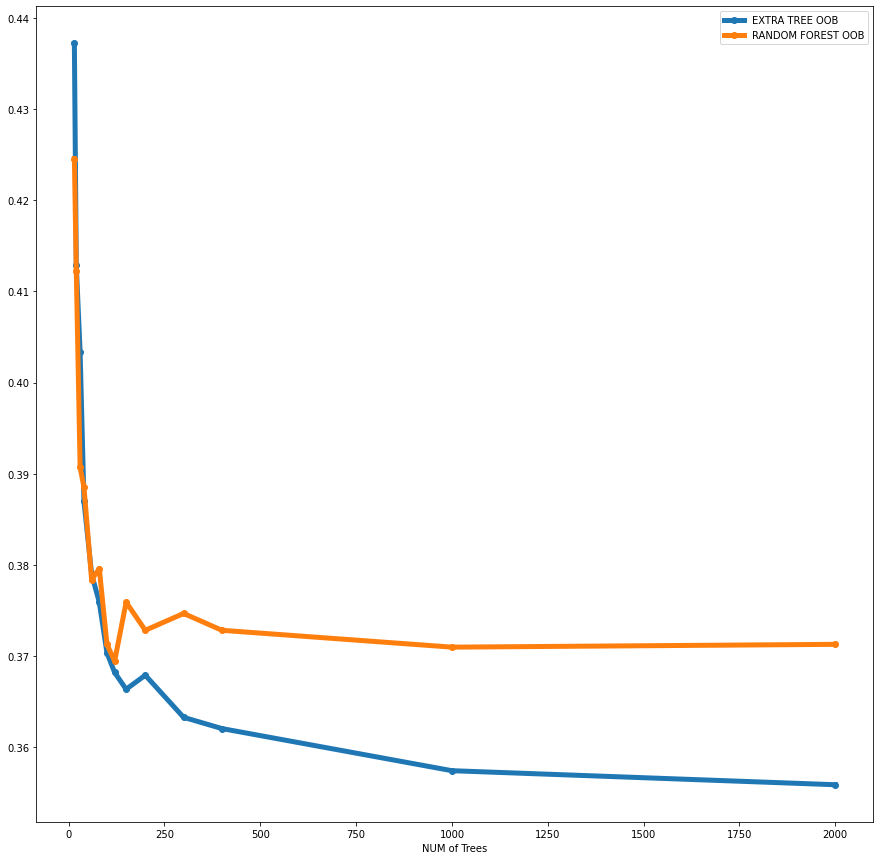

In [ ]:
ax = final_oob.plot(figsize=(15,15), marker='o', linewidth=5)
ax.set(ylabel="Out Of bag")

we see for this specific example, and this isn't always the case, that Extra Trees will perform a bit better. We see that random Extraa Trees perform better across each one of the number of estimators with that line of the error consistently below that of extra trees

# **Look Up For Metrics For EXTRA TREE**

In [ ]:
from sklearn.metrics import  roc_auc_score , precision_recall_curve , accuracy_score, f1_score,precision_score, recall_score

model = exTr.set_params(n_estimators=400)
y_pred_extra = model.predict(x_test_RF)
y_pred_prob = model.predict_proba(x_test_RF)




In [ ]:

report_extra_trees = classification_report(y_test_RF, y_pred_extra, digits=4)
print(report_KNN)
print(report_extra_trees)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        15
           4       0.70      0.13      0.22       108
           5       0.68      0.71      0.69      1069
           6       0.62      0.76      0.68      1418
           7       0.69      0.46      0.55       540
           8       0.85      0.29      0.43        97
           9       0.00      0.00      0.00         2

    accuracy                           0.65      3249
   macro avg       0.51      0.33      0.37      3249
weighted avg       0.66      0.65      0.64      3249

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000        15
           4     0.7000    0.1296    0.2188       108
           5     0.6824    0.7053    0.6937      1069
           6     0.6205    0.7574    0.6821      1418
           7     0.6917    0.4611    0.5533       540
           8     0.8485    0.2887    0.4308        97
           9     0.0000 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Conclusion and Futur Work**



*   As a result, we can see after we compare the classification report of KNN vs the classification report of Extra Tress we can see that KNN and Extra Trees gives result almost the same.

*   In the Next Step, I will try to make the classification as binary. I will change the quality column into binary 0 and 1; quality >= 0.5 then 1 else quality will be 0 and retry all the proccess
